In [1]:
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface
from models.embedder_with_classification_head import EmbedderClassifier
from data_loader import AnnotationDataLoader
from models.embedder_with_classification_head.embedders import (
    SentenceTransformerEmbedder,
)
from models.embedder_with_classification_head.classification_heads import (
    GenericSklearnCalssifier,
)
from sklearn.neural_network import MLPClassifier




### Train the model
if you don't wish to train it you can just load the pretrained model as we will show next

In [ ]:
config = {
    "solver": "adam",
    "random_state": 42,
    "max_iter": 500,
    "learning_rate_init": 0.0001,
    "hidden_layer_sizes": (64, 32),
    "early_stopping": False,
    "alpha": 0.01,
    "activation": "relu",
}


dataloader = AnnotationDataLoader()


embedder = SentenceTransformerEmbedder(r"pritamdeka/S-BioBert-snli-multinli-stsb")
classifier = GenericSklearnCalssifier(MLPClassifier, model_kwargs=config)
embedder_m = EmbedderClassifier(embedder, classifier)


In [ ]:
embedder_m.train(dataloader.get_train_all(resample=True, class_ratio={0: 0.5, 1: 0.5, 2: 1}))

In [4]:
embedder_m.model_info = str(config)
embedder_m.model_title = "Pretrained embedder"

## instead we can just load the pretrained one

In [2]:
embedder_m = EmbedderClassifier.load_model()
embedder_m.model_info = str(config)
embedder_m.model_title = "Pretrained embedder"

c:\Users\Elon\anaconda3\envs\main\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Elon\anaconda3\envs\main\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


NameError: name 'config' is not defined

## evaluate the model

In [15]:
m = ModelEvaluator(embedder_m, dataloader.get_last_test_set_no_overlap())
c_report = m.generate_report(include_probablities=True)


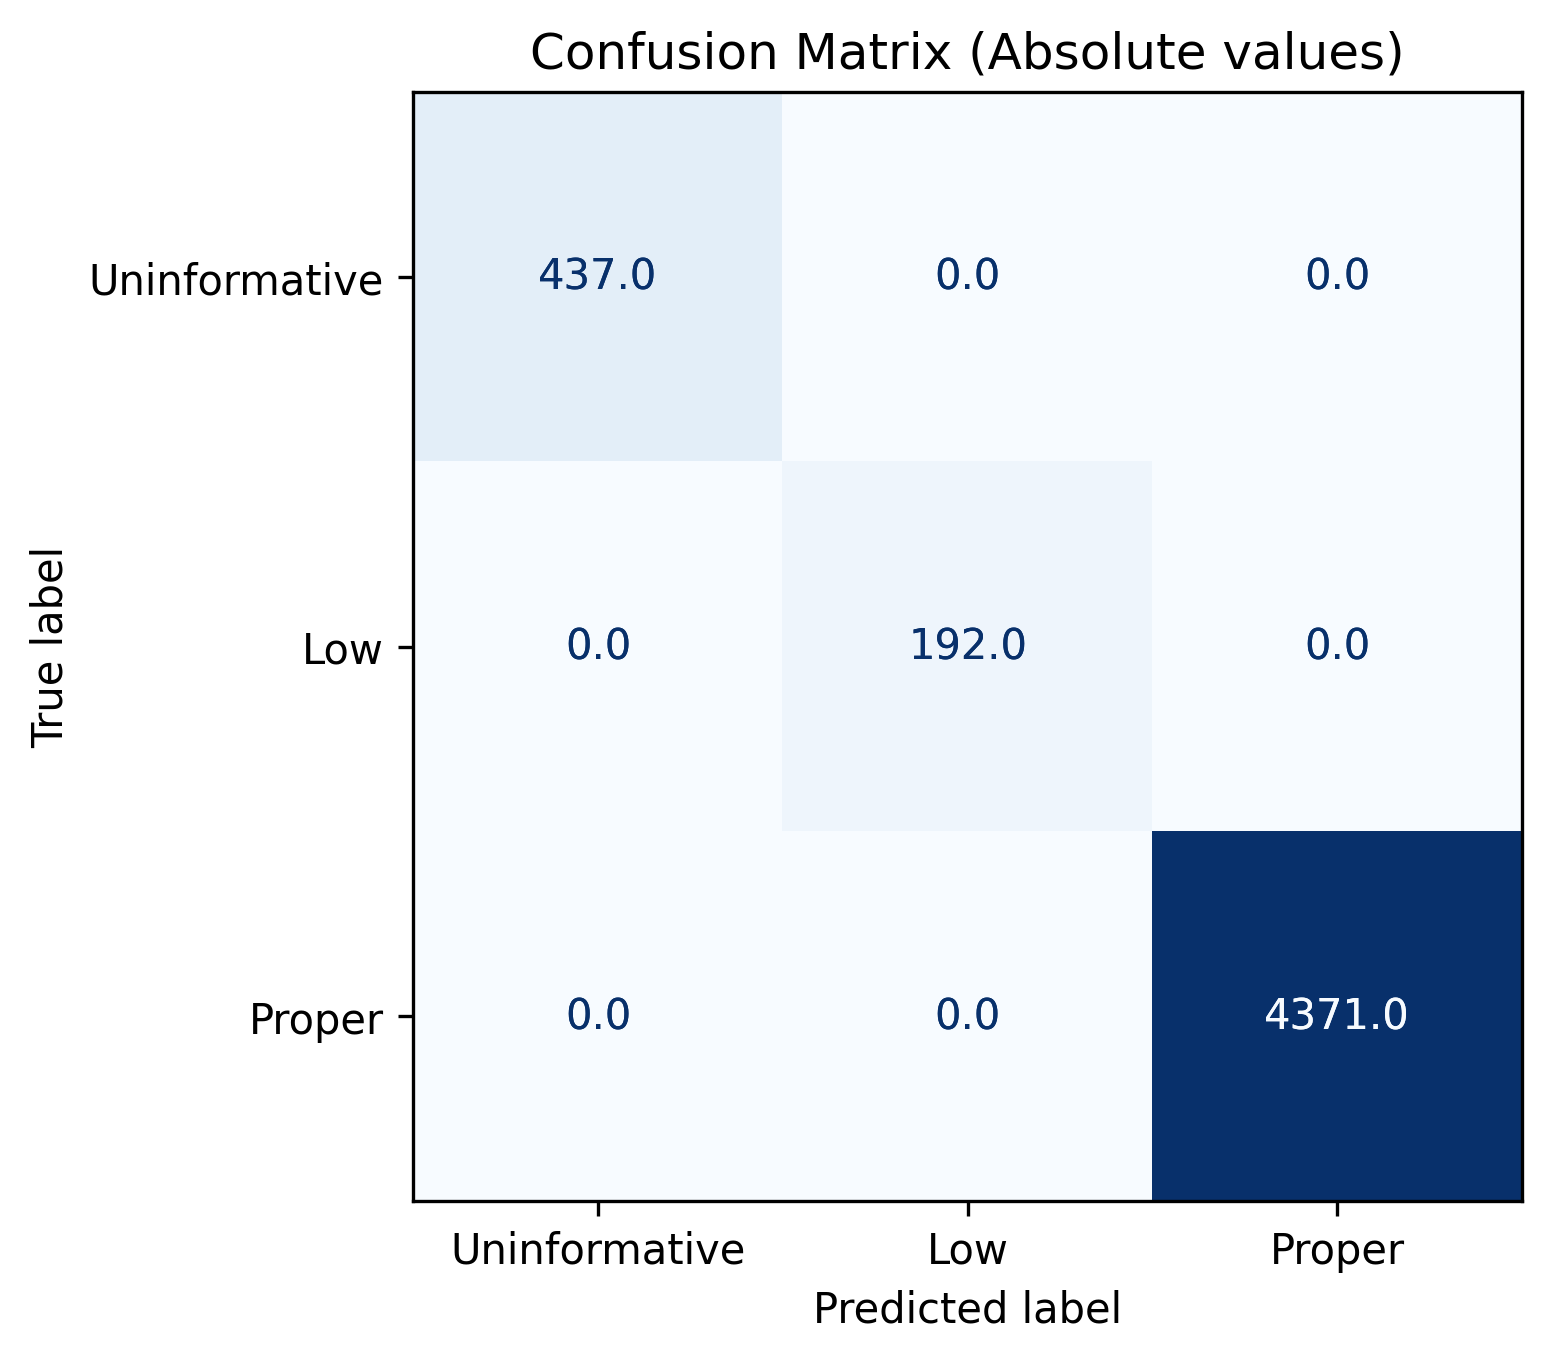
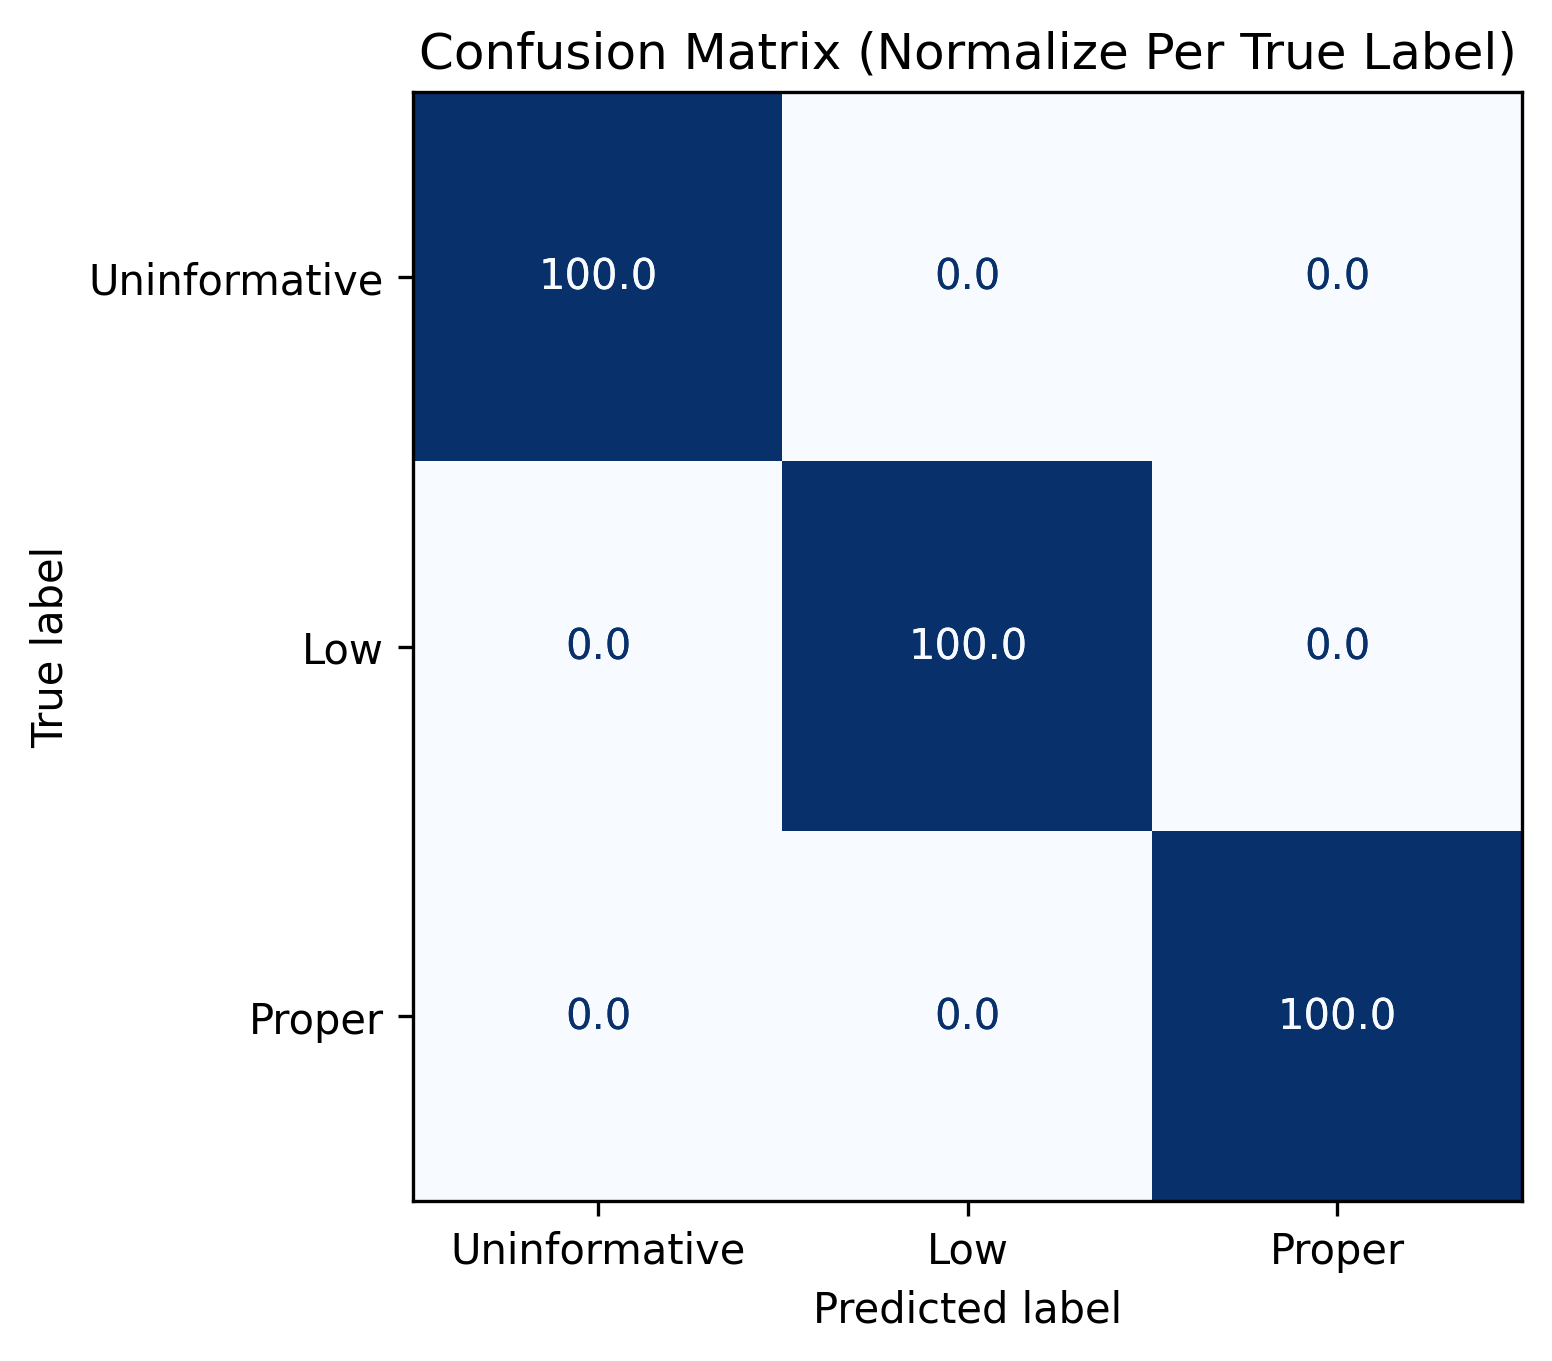

In [16]:
c_report.show_report()